In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('song_data.csv')

In [3]:
data.head()

,user_id,song_id,listen_count,title,artist,song
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Jack Johnson,The Cove - Jack Johnson
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Paco De Lucia,Entre Dos Aguas - Paco De Lucia
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Kanye West,Stronger - Kanye West
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,Jack Johnson,Constellations - Jack Johnson
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,Foo Fighters,Learn To Fly - Foo Fighters


In [4]:
data.isnull().sum()

user_id         0
song_id         0
listen_count    0
title           0
artist          0
song            0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116609 entries, 0 to 1116608
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   user_id       1116609 non-null  object
 1   song_id       1116609 non-null  object
 2   listen_count  1116609 non-null  int64 
 3   title         1116609 non-null  object
 4   artist        1116609 non-null  object
 5   song          1116609 non-null  object
dtypes: int64(1), object(5)
memory usage: 51.1+ MB


In [6]:
data.drop_duplicates(subset = "user_id", keep=False, inplace=False, ignore_index=False)

,user_id,song_id,listen_count,title,artist,song
45,85c1f87fea955d09b4bec2e36aee110927aedf9a,SODJTHN12AF72A8FCD,2,The Best of Times,Sage Francis,The Best of Times - Sage Francis
369,c2934b29d64e467297c608351ed9695ce62128bc,SOVIFRY12AB017B114,1,Visions,Cut Copy,Visions - Cut Copy
2511,dd7349a9e017c5ac51cb1cc97dd8a9ad057566b5,SODZJCH12A8C132ADC,1,Summer Wind (Duet With Frank Sinatra),Julio Iglesias duet with Frank Sinatra,Summer Wind (Duet With Frank Sinatra) - Julio ...
2741,0e695c8614e9d76a157f39d4b30e7b076d3f3147,SOCVTLJ12A6310F0FD,1,Clocks,Coldplay,Clocks - Coldplay
4753,38f8b6f0abab153083b15a0512b18f617df571bf,SOPURQO12A8C13EC4C,1,Gymnopedie No 1,Erik Satie,Gymnopedie No 1 - Erik Satie
...,...,...,...,...,...,...
1112584,2b51b7f7eaf85d1a4c1a7db4fe1f6a41910f3d4e,SOTRLCA12AF72A2D03,1,Banana Co,Radiohead,Banana Co - Radiohead
1112991,1057627ba81c2114a61a87f6db7380c5e33c3ecb,SOFETST12AB018759C,1,Ember Drive,Walls Of Jericho,Ember Drive - Walls Of Jericho
1114920,1a87184cb6ef5692ffda61659228f5eb040e1bb9,SOBUMYJ12AB01846D8,1,War,Sick Puppies,War - Sick Puppies
1116087,f2fcd6092fed2552f400daa4005769394c1eafd7,SOJSXJY12A8C13E32E,2,Clara meets Slope - Hard To Say,Clara Hill,Clara meets Slope - Hard To Say - Clara Hill


In [7]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()

data['user_id']= label_encoder.fit_transform(data['user_id'])
data['song_id']= label_encoder.fit_transform(data['song_id'])

## Exploratory Data Analysis

In [8]:
song_grouped = data.groupby(['song']).agg({'listen_count': 'count'}).reset_index()
grouped_sum = song_grouped['listen_count'].sum()
song_grouped['percentage']  = song_grouped['listen_count'].div(grouped_sum)*100
song_grouped.sort_values(['listen_count', 'song'], ascending = [0,1])

,song,listen_count,percentage
7122,Sehr kosmisch - Harmonia,5970,0.534654
9077,Undo - Björk,5281,0.472950
9873,You\'re The One - Dwight Yoakam,4806,0.430410
2062,Dog Days Are Over (Radio Edit) - Florence + Th...,4536,0.406230
6769,Revelry - Kings Of Leon,4339,0.388587
...,...,...,...
5120,Made In The Dark - Hot Chip,16,0.001433
5207,Marching Theme - Neutral Milk Hotel,15,0.001343
8932,Trahison - Vitalic,15,0.001343
3668,Hubcap - Sleater-kinney,12,0.001075


In [9]:
users = data['user_id'].unique()
len(users)

66346

In [10]:
songs = data['song'].unique()
len(songs)

9952

Text(0, 0.5, 'Item count')

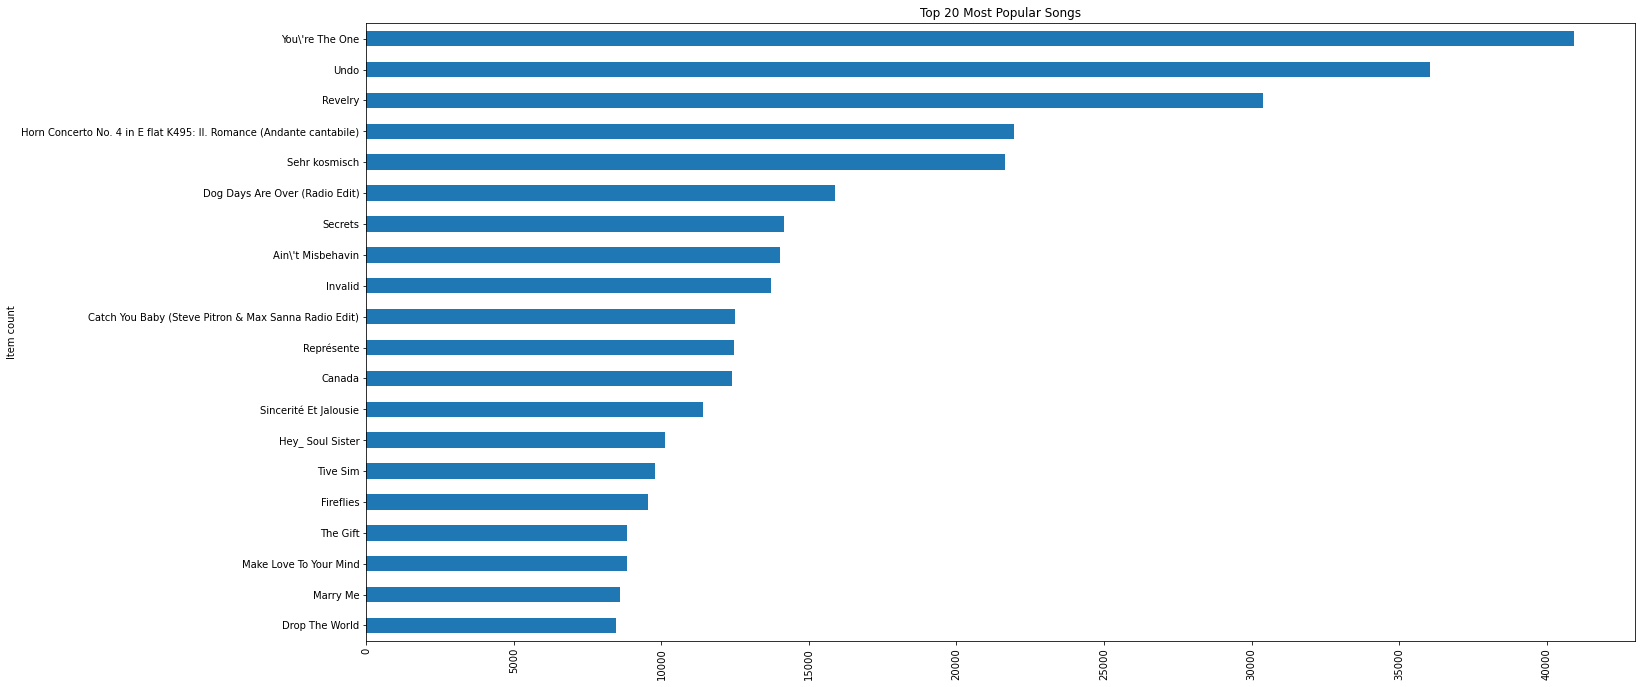

In [11]:
fig = plt.figure(figsize=(50, 25))
a1 = fig.add_subplot(221)
popular_songs = data[['title','listen_count']].groupby('title').sum().\
                sort_values('listen_count', ascending=False).head(20).sort_values('listen_count')
f1 = popular_songs.plot(kind='barh', title='Top 20 Most Popular Songs', legend=False, ax=a1)
plt.xticks(rotation='vertical')
plt.ylabel('Item count')

Text(0, 0.5, 'Item count')

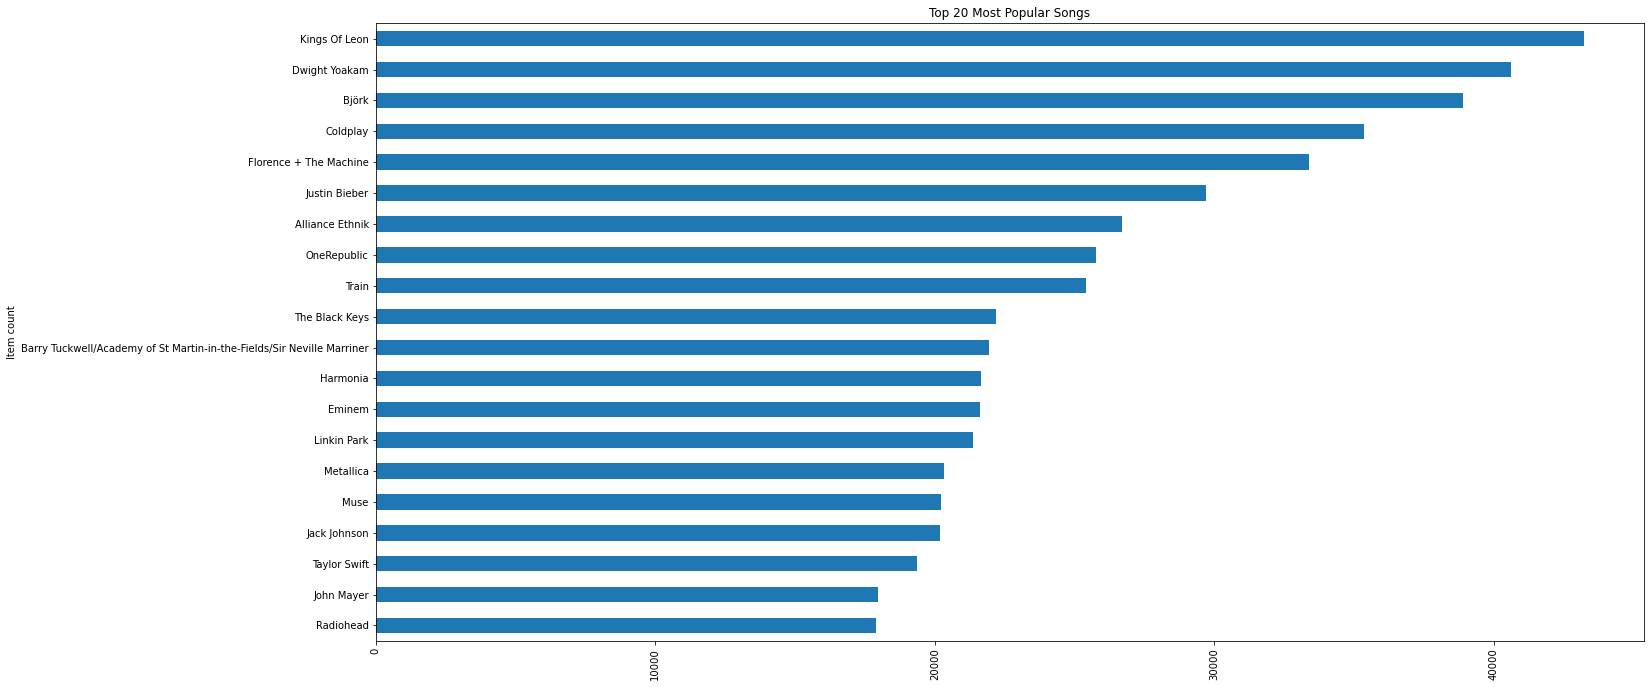

In [12]:
fig = plt.figure(figsize=(50, 25))
a2 = fig.add_subplot(221)
popular_songs = data[['artist','listen_count']].groupby('artist').sum().\
                sort_values('listen_count', ascending=False).head(20).sort_values('listen_count')
f1 = popular_songs.plot(kind='barh', title='Top 20 Most Popular Songs', legend=False, ax=a2)
plt.xticks(rotation='vertical')
plt.ylabel('Item count')

In [13]:
data.groupby('title')['listen_count'].mean().sort_values(ascending=False).head()

title
Crack Under Pressure               22.137255
221                                19.866071
The Quest                          15.380952
Working With Homesick              15.376344
Clara meets Slope - Hard To Say    15.017699
Name: listen_count, dtype: float64

In [14]:
count = pd.DataFrame(data.groupby('title')['listen_count'].mean())
count.head()

,listen_count
title,
#!*@ You Tonight [Featuring R. Kelly] (Explicit Album Version),2.173913
#40,5.685864
& Down,1.934307
(Anaesthesia) Pulling Teath,2.527778
(Antichrist Television Blues),1.571429


<AxesSubplot:>

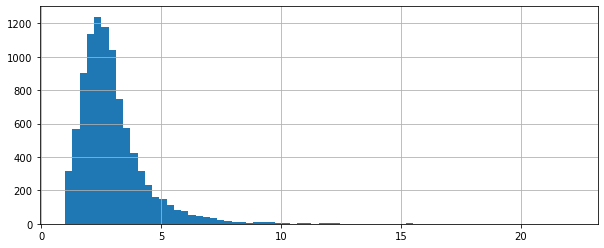

In [15]:
plt.figure(figsize=(10,4))
count['listen_count'].hist(bins=70)

In [16]:
n_users = data.user_id.nunique()
n_items = data.song_id.nunique()

In [17]:
## Model Building

In [18]:
df = data[data['listen_count']>10]

In [19]:
df

,user_id,song_id,listen_count,title,artist,song
76,19624,1811,13,Ghosts \'n\' Stuff (Original Instrumental Mix),Deadmau5,Ghosts \'n\' Stuff (Original Instrumental Mix)...
86,19624,8773,18,Push It,Salt-N-Pepa,Push It - Salt-N-Pepa
87,19624,9037,12,Speechless,Lady GaGa,Speechless - Lady GaGa
112,57937,8861,11,Corn Bread,DAVE MATTHEWS BAND,Corn Bread - DAVE MATTHEWS BAND
128,40422,8270,16,Raining Again (Steve Angello\'s Vocal Mix),Moby,Raining Again (Steve Angello\'s Vocal Mix) - Moby
...,...,...,...,...,...,...
1116570,43955,3050,11,Terre Promise,O\'Rosko Raricim,Terre Promise - O\'Rosko Raricim
1116571,43955,3488,31,End Of The Road,Boyz II Men,End Of The Road - Boyz II Men
1116572,43955,3743,19,Suffocate,J. Holiday,Suffocate - J. Holiday
1116573,43955,3894,29,Hypnotized (featuring Akon) (Explicit Album Ve...,Plies featuring Akon,Hypnotized (featuring Akon) (Explicit Album Ve...


In [20]:
df_subset = df[['user_id', 'song', 'listen_count']]
df_subset.head()

,user_id,song,listen_count
76,19624,Ghosts \'n\' Stuff (Original Instrumental Mix)...,13
86,19624,Push It - Salt-N-Pepa,18
87,19624,Speechless - Lady GaGa,12
112,57937,Corn Bread - DAVE MATTHEWS BAND,11
128,40422,Raining Again (Steve Angello\'s Vocal Mix) - Moby,16


In [21]:
df_subset.shape

(61711, 3)

# Memory-Based Collaborative Filtering

## 1. User based collaborative filtering

In [22]:
df_new = df_subset.pivot_table(index='user_id', columns='song', values='listen_count')

In [23]:
df_new

song,#!*@ You Tonight [Featuring R. Kelly] (Explicit Album Version) - The Notorious B.I.G.,#40 - DAVE MATTHEWS BAND,& Down - Boys Noize,(Anaesthesia) Pulling Teath - Metallica,(I Cant Get No) Satisfaction - Cat Power,(I Can\'t Get Me No) Satisfaction - Devo,(I Got That) Boom Boom - Britney Spears featuring Ying Yang Twins,(I Just) Died In Your Arms - Cutting Crew,(I\'ve Had) The Time Of My Life - Bill Medley & Jennifer Warnes,(If You\'re Wondering If I Want You To) I Want You To - Weezer,...,aNYway - Armand Van Helden & A-TRAK Present Duck Sauce,in white rooms - Booka Shade,mOBSCENE - Marilyn Manson,paranoid android - Christopher O\'Riley,re:stacks - Bon Iver,sillyworld (Album Version) - Stone Sour,teachme (Album Version) - Musiq Soulchild,the Love Song - K-OS,¡Viva La Gloria! (Album Version) - Green Day,Época - Gotan Project
user_id,,,,,,,,,,,,,,,,,,,,,
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#Impute those NaNs with 0 values
df_new.fillna(0, inplace=True)
df_new

song,#!*@ You Tonight [Featuring R. Kelly] (Explicit Album Version) - The Notorious B.I.G.,#40 - DAVE MATTHEWS BAND,& Down - Boys Noize,(Anaesthesia) Pulling Teath - Metallica,(I Cant Get No) Satisfaction - Cat Power,(I Can\'t Get Me No) Satisfaction - Devo,(I Got That) Boom Boom - Britney Spears featuring Ying Yang Twins,(I Just) Died In Your Arms - Cutting Crew,(I\'ve Had) The Time Of My Life - Bill Medley & Jennifer Warnes,(If You\'re Wondering If I Want You To) I Want You To - Weezer,...,aNYway - Armand Van Helden & A-TRAK Present Duck Sauce,in white rooms - Booka Shade,mOBSCENE - Marilyn Manson,paranoid android - Christopher O\'Riley,re:stacks - Bon Iver,sillyworld (Album Version) - Stone Sour,teachme (Album Version) - Musiq Soulchild,the Love Song - K-OS,¡Viva La Gloria! (Album Version) - Green Day,Época - Gotan Project
user_id,,,,,,,,,,,,,,,,,,,,,
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
#Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [26]:
user_sim = 1 - pairwise_distances(df_new.values,metric='cosine')

In [27]:
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [28]:
#Store the results in a dataframe
user_sim_df = pd.DataFrame(user_sim)

In [31]:
#Set the index and column names to user ids 
user_sim_df.index = df_subset.user_id.unique()
user_sim_df.columns = df_subset.user_id.unique()

In [32]:
user_sim_df.iloc[0:5, 0:5]

,19624,57937,40422,43683,2789
19624,1.0,0.0,0.0,0.0,0.0
57937,0.0,1.0,0.0,0.0,0.0
40422,0.0,0.0,1.0,0.0,0.0
43683,0.0,0.0,0.0,1.0,0.0
2789,0.0,0.0,0.0,0.0,1.0


In [33]:
np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:5, 0:5]

,19624,57937,40422,43683,2789
19624,0.0,0.0,0.0,0.0,0.0
57937,0.0,0.0,0.0,0.0,0.0
40422,0.0,0.0,0.0,0.0,0.0
43683,0.0,0.0,0.0,0.0,0.0
2789,0.0,0.0,0.0,0.0,0.0


In [34]:
#Most Similar Users
user_sim_df.idxmax(axis=1)

19624    58493
57937    58029
40422    44205
43683     1921
2789     24256
         ...  
15164     8090
48082    10871
14812    14515
40044    65939
43955    59470
Length: 21874, dtype: int64

In [35]:
# extract the songs which userId 19624 & 40044  have listened
df_subset[(df_subset['user_id']==19624) | (df_subset['user_id']==40044 )]

,user_id,song,listen_count
76,19624,Ghosts \'n\' Stuff (Original Instrumental Mix)...,13
86,19624,Push It - Salt-N-Pepa,18
87,19624,Speechless - Lady GaGa,12
1116559,40044,Close My Eyes Forever - Lita Ford & Ozzy Osborne,13


In [37]:
user_1=df_subset[(df_subset['user_id']==19624)]
user_2=df_subset[(df_subset['user_id']==40044)]

In [38]:
user_1['song']

76    Ghosts \'n\' Stuff (Original Instrumental Mix)...
86                                Push It - Salt-N-Pepa
87                               Speechless - Lady GaGa
Name: song, dtype: object

In [39]:
user_2['song']

1116559    Close My Eyes Forever - Lita Ford & Ozzy Osborne
Name: song, dtype: object

In [40]:
pd.merge(user_1,user_2,on='song',how='outer')

,user_id_x,song,listen_count_x,user_id_y,listen_count_y
0,19624.0,Ghosts \'n\' Stuff (Original Instrumental Mix)...,13.0,NaN,NaN
1,19624.0,Push It - Salt-N-Pepa,18.0,NaN,NaN
2,19624.0,Speechless - Lady GaGa,12.0,NaN,NaN
3,NaN,Close My Eyes Forever - Lita Ford & Ozzy Osborne,NaN,40044.0,13.0


## 2. Item Based Collaborative Filtering

In [42]:
song_sim = 1 - pairwise_distances( df_new.T.values, metric="cosine" )

In [43]:
song_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [44]:
#Store the results in a dataframe
song_sim_df = pd.DataFrame(song_sim)

In [45]:
#Set the index and column names to songs 
song_sim_df.index = df_subset.song.unique()
song_sim_df.columns = df_subset.song.unique()

In [46]:
song_sim_df.iloc[0:5, 0:5]

,Ghosts \'n\' Stuff (Original Instrumental Mix) - Deadmau5,Push It - Salt-N-Pepa,Speechless - Lady GaGa,Corn Bread - DAVE MATTHEWS BAND,Raining Again (Steve Angello\'s Vocal Mix) - Moby
Ghosts \'n\' Stuff (Original Instrumental Mix) - Deadmau5,1.0,0.0,0.0,0.0,0.0
Push It - Salt-N-Pepa,0.0,1.0,0.0,0.0,0.0
Speechless - Lady GaGa,0.0,0.0,1.0,0.0,0.0
Corn Bread - DAVE MATTHEWS BAND,0.0,0.0,0.0,1.0,0.0
Raining Again (Steve Angello\'s Vocal Mix) - Moby,0.0,0.0,0.0,0.0,1.0


In [47]:
np.fill_diagonal(song_sim, 0)
song_sim_df.iloc[0:5, 0:5]

,Ghosts \'n\' Stuff (Original Instrumental Mix) - Deadmau5,Push It - Salt-N-Pepa,Speechless - Lady GaGa,Corn Bread - DAVE MATTHEWS BAND,Raining Again (Steve Angello\'s Vocal Mix) - Moby
Ghosts \'n\' Stuff (Original Instrumental Mix) - Deadmau5,0.0,0.0,0.0,0.0,0.0
Push It - Salt-N-Pepa,0.0,0.0,0.0,0.0,0.0
Speechless - Lady GaGa,0.0,0.0,0.0,0.0,0.0
Corn Bread - DAVE MATTHEWS BAND,0.0,0.0,0.0,0.0,0.0
Raining Again (Steve Angello\'s Vocal Mix) - Moby,0.0,0.0,0.0,0.0,0.0


In [48]:
#Most Similar songs
song_sim_df.idxmax(axis=1)

Ghosts \'n\' Stuff (Original Instrumental Mix) - Deadmau5                         Smile Version Revisited (Mark Ronson Remix) (E...
Push It - Salt-N-Pepa                                                                            Beautiful_ Dirty_ Rich - Lady GaGa
Speechless - Lady GaGa                                                                           I\'m Gonna Miss Her - Brad Paisley
Corn Bread - DAVE MATTHEWS BAND                                                   Ghosts \'n\' Stuff (Original Instrumental Mix)...
Raining Again (Steve Angello\'s Vocal Mix) - Moby                                                       Addicted - Enrique Iglesias
                                                                                                        ...                        
I Got Nerve (Karaoke) - Aruna Abrams/Ken Hauptman/Jeannie Lurie                                      Bow Down - Westside Connection
I\'m Talkin\' To You (Explicit Album Version) - T.I.                        

In [52]:
# analysing correlation with similar songs
ladygaga_user_ratings = df_new['Speechless - Lady GaGa']
push_user_ratings = df_new['Push It - Salt-N-Pepa']
 
ladygaga_user_ratings.head()

user_id
7     0.0
11    0.0
14    0.0
16    0.0
17    0.0
Name: Speechless - Lady GaGa, dtype: float64

In [53]:
similar_to_ladygaga = df_new.corrwith(ladygaga_user_ratings)
similar_to_push = df_new.corrwith(push_user_ratings)
 
corr_ladygaga = pd.DataFrame(similar_to_ladygaga, columns =['Correlation'])
corr_ladygaga.dropna(inplace = True)
 
corr_ladygaga.head()

,Correlation
song,
#!*@ You Tonight [Featuring R. Kelly] (Explicit Album Version) - The Notorious B.I.G.,-0.000123
#40 - DAVE MATTHEWS BAND,-0.000540
& Down - Boys Noize,-0.000123
(Anaesthesia) Pulling Teath - Metallica,-0.000123
(I Cant Get No) Satisfaction - Cat Power,-0.000228


# Model Based Collaborative Filtering

In [58]:
df_new.head()

song,#!*@ You Tonight [Featuring R. Kelly] (Explicit Album Version) - The Notorious B.I.G.,#40 - DAVE MATTHEWS BAND,& Down - Boys Noize,(Anaesthesia) Pulling Teath - Metallica,(I Cant Get No) Satisfaction - Cat Power,(I Can\'t Get Me No) Satisfaction - Devo,(I Got That) Boom Boom - Britney Spears featuring Ying Yang Twins,(I Just) Died In Your Arms - Cutting Crew,(I\'ve Had) The Time Of My Life - Bill Medley & Jennifer Warnes,(If You\'re Wondering If I Want You To) I Want You To - Weezer,...,aNYway - Armand Van Helden & A-TRAK Present Duck Sauce,in white rooms - Booka Shade,mOBSCENE - Marilyn Manson,paranoid android - Christopher O\'Riley,re:stacks - Bon Iver,sillyworld (Album Version) - Stone Sour,teachme (Album Version) - Musiq Soulchild,the Love Song - K-OS,¡Viva La Gloria! (Album Version) - Green Day,Época - Gotan Project
user_id,,,,,,,,,,,,,,,,,,,,,
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
df_new.shape

(21874, 8237)

In [60]:
# Transpose the matrix
X = df_new.values.T
X.shape

(8237, 21874)

In [61]:
## Decomposing the matrix

In [62]:
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=12, random_state=17)
result_matrix = SVD.fit_transform(X)
result_matrix.shape

(8237, 12)

In [63]:
## Genearing correlation matrix

In [64]:
# PearsonR coef 
corr_matrix = np.corrcoef(result_matrix)
corr_matrix.shape

(8237, 8237)

In [67]:
col = df_new.columns.get_loc("Bow Down - Westside Connection")
corr = corr_matrix[col]
pd.DataFrame({'Correlation':corr, 'Songs': df_new.columns})

,Correlation,Songs
0,0.834897,#!*@ You Tonight [Featuring R. Kelly] (Explici...
1,-0.179800,#40 - DAVE MATTHEWS BAND
2,0.765371,& Down - Boys Noize
3,0.233725,(Anaesthesia) Pulling Teath - Metallica
4,0.312019,(I Cant Get No) Satisfaction - Cat Power
...,...,...
8232,0.012572,sillyworld (Album Version) - Stone Sour
8233,0.300173,teachme (Album Version) - Musiq Soulchild
8234,0.851924,the Love Song - K-OS
8235,-0.051536,¡Viva La Gloria! (Album Version) - Green Day
